In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [172]:
test_data = pd.read_parquet("test.parquet")
test_data

,id,dates,values
0,6125,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[1.85, -0.04, 0.19, -0.45, -0.75, -0.95, -2.91..."
1,26781,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[-0.41, 0.39, -0.47, -0.9, -1.46, -0.51, 0.51,..."
2,13333,"[2016-06-01, 2016-07-01, 2016-08-01, 2016-09-0...","[-0.29, -1.26, 0.17, -1.22, 0.45, -0.94, 0.16,..."
3,53218,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[-1.47, 1.55, -0.03, 0.57, -0.57, 0.6, 0.27, 1..."
4,84204,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[2.33, 1.39, -1.03, -2.64, 1.89, 1.77, 1.43, 1..."
...,...,...,...
19995,80341,"[2016-03-01, 2016-04-01, 2016-05-01, 2016-06-0...","[3.01, -0.58, 1.55, 0.48, -0.35, 1.93, 3.86, 2..."
19996,5891,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[0.66, 1.3, 2.78, -0.25, -1.97, -0.55, -1.08, ..."
19997,29091,"[2017-01-01, 2017-02-01, 2017-03-01, 2017-04-0...","[0.09, 0.44, 1.55, 0.15, 0.3, 0.19, 0.34, 1.05..."
19998,85877,"[2017-04-01, 2017-05-01, 2017-06-01, 2017-07-0...","[0.28, 1.92, 1.14, 2.4, 1.46, 1.08, -0.12, 0.6..."


In [173]:
train_data = pd.read_parquet("train.parquet")
train_data

,id,dates,values,label
0,19114,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[-1.86, 0.79, 1.4, 0.15, 0.0, -1.24, -1.46, 3....",0.0
1,22769,"[2016-05-01, 2016-06-01, 2016-07-01, 2016-08-0...","[-1.04, -3.48, 0.05, -0.13, -0.01, 0.03, 0.27,...",1.0
2,76935,"[2017-03-01, 2017-04-01, 2017-05-01, 2017-06-0...","[0.28, 0.63, 0.06, 0.96, -1.4, -0.3, 1.62, 1.1...",0.0
3,66297,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[-0.33, 0.58, 1.1, -0.56, -0.95, -0.61, -0.7, ...",0.0
4,2191,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[1.31, 0.5, -0.54, 0.95, 0.65, 0.83, -1.55, -0...",0.0
...,...,...,...,...
79995,71474,"[2018-10-01, 2018-11-01, 2018-12-01, 2019-01-0...","[-0.15, -1.13, -0.87, 0.49, 0.87, 1.67, 1.91, ...",0.0
79996,36908,"[2016-07-01, 2016-08-01, 2016-09-01, 2016-10-0...","[-0.35, -1.31, 0.11, 1.46, 1.28, 1.12, 1.78, 1...",1.0
79997,63517,"[2016-03-01, 2016-04-01, 2016-05-01, 2016-06-0...","[-0.78, -2.27, -1.85, -0.67, -1.2, -2.02, 0.12...",0.0
79998,94731,"[2016-02-01, 2016-03-01, 2016-04-01, 2016-05-0...","[-2.29, -2.85, 0.92, -0.83, -1.75, -1.81, -2.2...",0.0


In [174]:
train_data['dates'] = train_data['dates'].apply(lambda x: pd.to_datetime(x))
train_data.head(5)

,id,dates,values,label
0,19114,"DatetimeIndex(['2016-01-01', '2016-02-01', '20...","[-1.86, 0.79, 1.4, 0.15, 0.0, -1.24, -1.46, 3....",0.0
1,22769,"DatetimeIndex(['2016-05-01', '2016-06-01', '20...","[-1.04, -3.48, 0.05, -0.13, -0.01, 0.03, 0.27,...",1.0
2,76935,"DatetimeIndex(['2017-03-01', '2017-04-01', '20...","[0.28, 0.63, 0.06, 0.96, -1.4, -0.3, 1.62, 1.1...",0.0
3,66297,"DatetimeIndex(['2016-01-01', '2016-02-01', '20...","[-0.33, 0.58, 1.1, -0.56, -0.95, -0.61, -0.7, ...",0.0
4,2191,"DatetimeIndex(['2016-01-01', '2016-02-01', '20...","[1.31, 0.5, -0.54, 0.95, 0.65, 0.83, -1.55, -0...",0.0


In [175]:
train_positive = train_data[train_data["label"] == 1]
train_negative = train_data[train_data["label"] == 0]

In [176]:
print(train_positive.shape[0])
print(train_negative.shape[0])
print(train_positive['values'].explode().astype(float).describe())
print(train_negative['values'].explode().astype(float).describe())

22180
57820
count    1.409062e+06
mean    -1.105139e-01
std      1.238861e+00
min     -7.950000e+00
25%     -9.100000e-01
50%     -2.000000e-01
75%      6.800000e-01
max      9.540000e+00
Name: values, dtype: float64
count    3.741768e+06
mean     5.500314e-04
std      1.218057e+00
min     -7.480000e+00
25%     -8.100000e-01
50%     -9.000000e-02
75%      7.900000e-01
max      9.270000e+00
Name: values, dtype: float64


In [177]:
print(train_data['values'].apply(lambda x: np.isnan(x).any()).any())

True


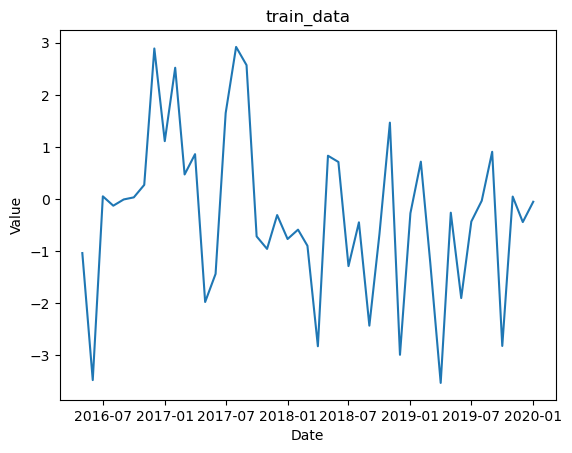

In [178]:
for _, row in train_positive.head(1).iterrows():
    plt.plot(row["dates"], row["values"])
plt.title("train_data")
plt.xlabel("Date")
plt.ylabel("Value")
plt.show()

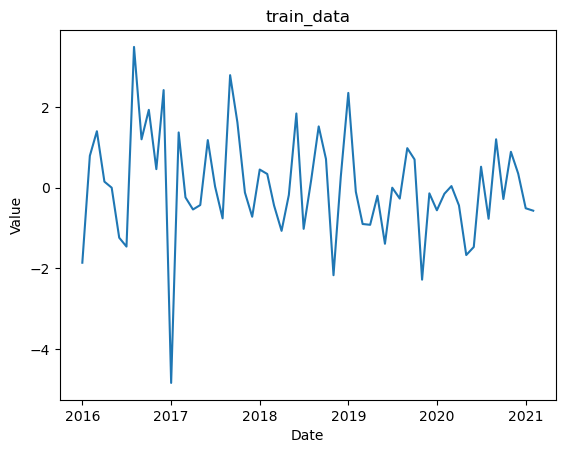

In [179]:
for _, row in train_negative.head(1).iterrows():
    plt.plot(row["dates"], row["values"])
plt.title("train_data")
plt.xlabel("Date")
plt.ylabel("Value")
plt.show()

После прогона модели со всеми фичами были получены следующие импортанты и умбраны 8 хуйдших фич


Feature 28: value_stationarity - 1355
Feature 29: value_acf_mean - 1307
Feature 15: value_std - 1257
Feature 11: mean_value - 987
Feature 20: cumulative_change - 811
Feature 27: value_quantile_75 - 793
Feature 25: value_quantile_25 - 764
Feature 12: max_value - 749
Feature 16: value_skew - 736
Feature 24: value_entropy - 732
Feature 26: value_quantile_50 - 723
Feature 17: value_kurt - 674
Feature 14: value_range - 663
Feature 13: min_value - 648
Feature 8: year_mean - 637
Feature 5: std_days_between_dates - 620
Feature 6: weekday_mean - 560
Feature 0: days_diff - 550
Feature 7: month_mean - 459
Feature 19: negative_change_ratio - 449
Feature 18: positive_change_ratio - 424
Feature 9: quarter_mean - 358
Feature 22: value_peaks - 305
Feature 23: value_valleys - 242
Feature 10: is_weekend_count - 113
Feature 21: value_turning_points - 94
Feature 1: len_data - 30
Feature 4: min_days_between_dates - 0
Feature 3: max_days_between_dates - 0
Feature 2: mean_days_between_dates - 0

In [180]:
import warnings
from statsmodels.tsa.stattools import adfuller, acf

warnings.filterwarnings("ignore")

def add_features(train_data):
    
    train_data['values'] = train_data['values'].apply(lambda x: np.random.uniform(-0.5, 0.5, size=len(x)) if np.isnan(x).any() else x)
    # train_data['dates'] = train_data['dates'].apply(lambda x: sorted(x))
    train_data['days_diff'] = train_data['dates'].apply(lambda x: (x[-1] - x[0]).days)
    # train_data['len_data'] = train_data['dates'].apply(lambda x: len(x))
    # train_data['days_between_dates'] = train_data['dates'].apply(lambda x: np.diff(x).astype('timedelta64[D]'))
    # train_data['mean_days_between_dates'] = train_data['days_between_dates'].apply(lambda x: np.mean(x).astype(int))
    # train_data['max_days_between_dates'] = train_data['days_between_dates'].apply(lambda x: np.max(x).astype(int))
    # train_data['min_days_between_dates'] = train_data['days_between_dates'].apply(lambda x: np.min(x).astype(int))
    # train_data['std_days_between_dates'] = train_data['days_between_dates'].apply(lambda x: np.std(x.astype(int)))
    train_data['weekday_mean'] = train_data['dates'].apply(lambda x: np.array([d.weekday() for d in x]).mean())
    train_data['weekday'] = train_data['dates'].apply(lambda x: [d.weekday() for d in x])
    # train_data['month_mean'] = train_data['dates'].apply(lambda x: np.array([d.month for d in x]).mean())
    train_data['year_mean'] = train_data['dates'].apply(lambda x: np.array([d.year for d in x]).mean())
    # train_data['quarter_mean'] = train_data['dates'].apply(lambda x: np.array([d.quarter for d in x]).mean())
    # train_data['is_weekend_count'] = train_data['weekday'].apply(lambda x: sum([d >= 5 for d in x]))

    train_data['mean_value'] = train_data['values'].apply(lambda x: np.mean(x))
    train_data['max_value'] = train_data['values'].apply(lambda x: np.max(x))
    train_data['min_value'] = train_data['values'].apply(lambda x: np.min(x))
    train_data['value_range'] = train_data['max_value'] - train_data['min_value']
    train_data['value_std'] = train_data['values'].apply(lambda x: np.std(x))
    train_data['value_skew'] = train_data['values'].apply(lambda x: scipy.stats.skew(x))
    train_data['value_kurt'] = train_data['values'].apply(lambda x: scipy.stats.kurtosis(x))
    # train_data['positive_change_ratio'] = train_data['values'].apply(lambda x: np.sum(x > 0) / len(x))
    # train_data['negative_change_ratio'] = train_data['values'].apply(lambda x: np.sum(x < 0) / len(x))
    train_data['cumulative_change'] = train_data['values'].apply(lambda x: np.cumsum(x)[-1])
    # train_data['value_turning_points'] = train_data['values'].apply(lambda x: np.sum(np.diff(np.sign(np.diff(x)))) != 0)
    # train_data['value_peaks'] = train_data['values'].apply(lambda x: len(scipy.signal.find_peaks(x)[0]))
    # train_data['value_valleys'] = train_data['values'].apply(lambda x: len(scipy.signal.find_peaks(-x)[0]))
    train_data['value_entropy'] = train_data['values'].apply(lambda x: scipy.stats.entropy(np.histogram(x, bins='auto')[0]))
    train_data['value_quantile_25'] = train_data['values'].apply(lambda x: np.quantile(x, q=0.25))
    train_data['value_quantile_50'] = train_data['values'].apply(lambda x: np.quantile(x, q=0.5))
    train_data['value_quantile_75'] = train_data['values'].apply(lambda x: np.quantile(x, q=0.75))

    train_data['value_stationarity'] = train_data['values'].apply(lambda x: adfuller(x)[1])
    train_data['value_acf_mean'] = train_data['values'].apply(lambda x: np.mean(acf(x, nlags=10)))


    train_data_droped = train_data.drop(labels=['dates', 'values', 'weekday'], axis=1)
    print(train_data_droped.columns)
    return train_data_droped

In [181]:
# train_data_droped = add_features(train_data)

Данные граффики были получены с помощью расширения в VS по train_data_droped со всеми сгенеренными фичами. Писать код для всех просто не видел смысл

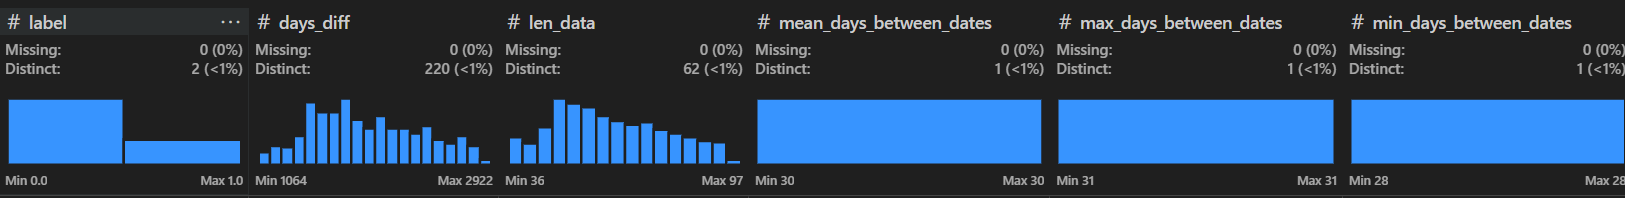
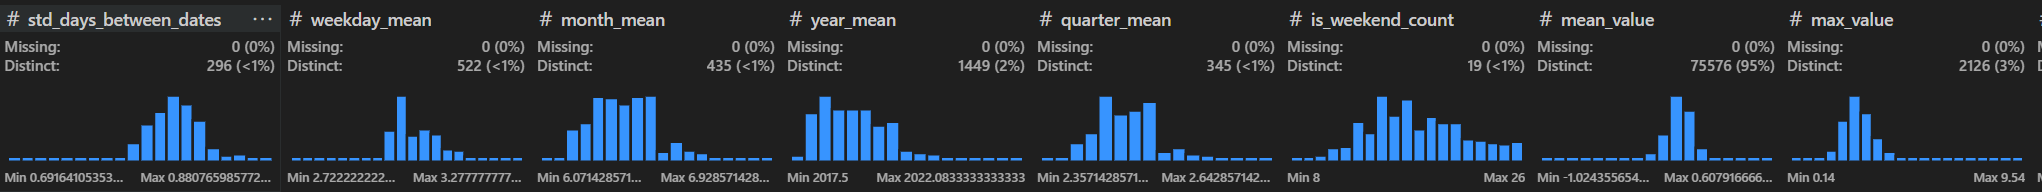
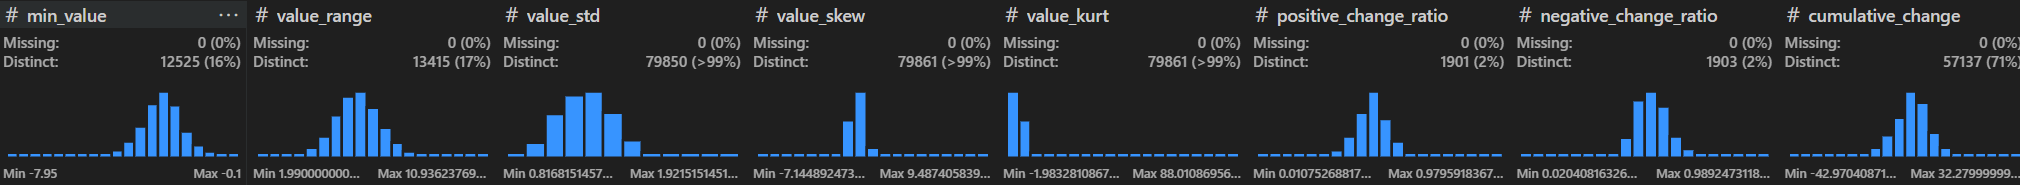
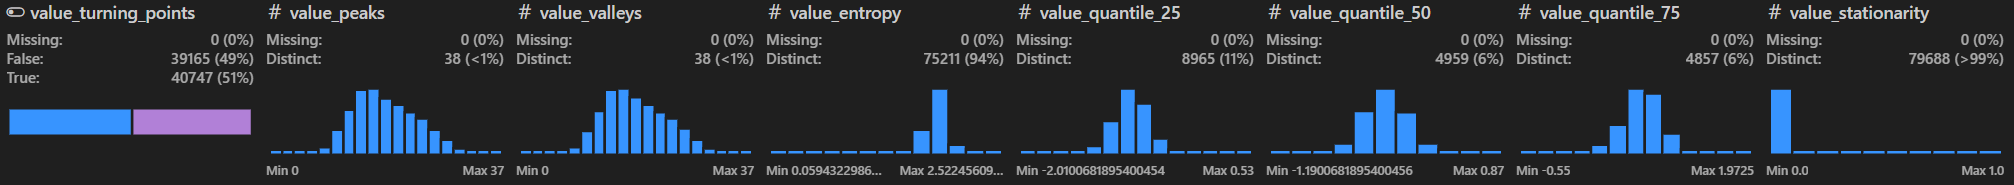
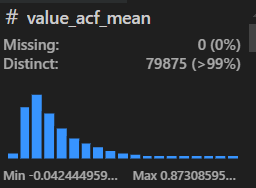

In [183]:
import lightgbm as lgb
# from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, recall_score, precision_score, accuracy_score

# X_train, X_test, y_train, y_test = train_test_split(train_data_droped.drop(['label'], axis=1), train_data_droped['label'], test_size=0.2, random_state=42, stratify=train_data_droped['label'])

# train_dataset = lgb.Dataset(X_train, label=y_train)
# test_dataset = lgb.Dataset(X_test, label=y_test)

# params = {
#     'objective': 'binary',
#     'metric': 'auc',
#     'boosting': 'gbdt',
#     'num_leaves': 50,
#     'learning_rate': 0.05,
#     'feature_fraction': 0.9,
#     'bagging_fraction': 0.8,
#     'bagging_freq': 5,
#     'verbose': 0,
#     'is_unbalance': True,
#     'early_stopping_rounds': 200,
# }

In [184]:
# model = lgb.train(params, train_dataset, valid_sets=[test_dataset], num_boost_round=10000)

In [185]:
# y_pred = model.predict(X_test)

In [186]:
# print('ROC AUC:', roc_auc_score(y_test, y_pred))
# y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]
# print('recall score:', recall_score(y_test, y_pred_binary))
# print('precision score:', precision_score(y_test, y_pred_binary))
# print('acc score:', accuracy_score(y_test, y_pred_binary))
# print('F1 score:', f1_score(y_test, y_pred_binary))

In [187]:
# feature_importance = model.feature_importance()

# sorted_indices = np.argsort(feature_importance)[::-1]

# top_features = sorted_indices[:len(feature_importance)]

# for i in top_features:
#     print(f'Feature {i}: {X_train.columns[i]} - {feature_importance[i]}')

In [188]:
# import optuna
# def objective(trial):

#     params = {
#         'objective': 'binary',
#         'metric': 'auc',
#         'boosting': 'gbdt',
#         'num_leaves': trial.suggest_int('num_leaves', 20, 300),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
#         'feature_fraction': trial.suggest_float('feature_fraction', 0.5, 0.9),
#         'bagging_fraction': trial.suggest_float('bagging_fraction', 0.5, 0.9),
#         'bagging_freq': 5,
#         'verbose': -1,
#         'is_unbalance': True,
#         'device': 'gpu',
#         'gpu_platform_id': 0,
#         'gpu_device_id': 0
#     }

#     train_data = lgb.Dataset(X_train, label=y_train)
#     test_data = lgb.Dataset(X_test, label=y_test)l
#     model = lgb.train(params, train_data, valid_sets=[test_data], num_boost_round=10000)
#     y_pred = model.predict(X_test)
#     roc_auc = roc_auc_score(y_test, y_pred)
#     return roc_auc


# study = optuna.create_study(direction='maximize')

In [189]:
# study.optimize(objective, n_trials=100) 

In [190]:
# print('Best parameters:', study.best_params)

In [191]:
# params = study.best_params
# params['objective'] = 'binary'
# params['metric'] = 'auc'
# params['boosting'] = 'gbdt'
# params['verbose'] = -1
# train_data = lgb.Dataset(X_train, label=y_train)
# model = lgb.train(params, train_data, num_boost_round=10000)

In [192]:
# y_pred = model.predict(X_test)

In [193]:
# print('ROC AUC:', roc_auc_score(y_test, y_pred))
# y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]
# print('recall score:', recall_score(y_test, y_pred_binary))
# print('precision score:', precision_score(y_test, y_pred_binary))
# print('acc score:', accuracy_score(y_test, y_pred_binary))
# print('F1 score:', f1_score(y_test, y_pred_binary))

Как видно, достичь лучшего результата не получилось -> нужно больше итераций тюнинга и увеличить область гиперпараметров. Так же стоит отметить 

In [194]:
# model.save_model('model.json')

In [195]:
loaded_model = lgb.Booster(model_file='model.json')
test_dataset = add_features(test_data)

Index(['id', 'days_diff', 'weekday_mean', 'year_mean', 'mean_value',
       'max_value', 'min_value', 'value_range', 'value_std', 'value_skew',
       'value_kurt', 'cumulative_change', 'value_entropy', 'value_quantile_25',
       'value_quantile_50', 'value_quantile_75', 'value_stationarity',
       'value_acf_mean'],
      dtype='object')


In [196]:
y_pred = loaded_model.predict(test_dataset.drop(['id'], axis=1))
rez = pd.DataFrame({'id': test_dataset['id'], 'score': y_pred})

In [197]:
rez.to_csv('submission.csv', index=False)